# Notebook de verificação da similaridade entre ementas de disciplinas

## Introdução:
O estudante da UFABC passa muito tempo já em sua graduação para terminar as disciplinas do seu BI e do pós-BI e isso afeta principalmente os alunos de cursos mais concorridos como é o de computação, em que as disciplinas podem ter mais de 150% de requisição. Tendo em vista isso, na UFABC temos dois processos já estruturados que é o prcesso de covalidação e de equivalencia, normatizados nas resuluções ConsEPE nº 157/2013 e CG Nº 023/2019 respectivamente. Covalidação é um processo interno da UFABC que é basicamente para a transição de projetos pedagógicos, de forma que o(a) estudante consegue integralizar o curso em um PPC antigo com disciplinas novas e a equivalência é um processo que uma disciplina de fora pode ter alguma similaridade de uma disciplina da ufabc e do curso que você quer se formar. Assim está presente na Resolução CG Nº 023/2019 o seguinte:

>Art. 4º Consistem em requisitos para a dispensa por equivalência, para disciplinas
cursadas no Brasil:

>> I. a carga horária total da disciplina cursada deve ser igual ou maior à carga horária da que se pede equivalência;

>> II. o conteúdo da disciplina cursada deve ser compatível e correspondente a, no mínimo, 75% (setenta e cinco por cento) do conteúdo daquela de que se pede equivalência, considerando-se teoria e prática, quando for o caso. 

>>>Parágrafo único: Excepcionalmente, e mediante justificativa, a coordenação de curso pode autorizar equivalências que cumpram parcialmente estes requisito

Utilizando essa base das normativas, seria interessante se conseguissimos fazer uma equivalencia entre disciplinas da ufabc utilizando os mesmos críterios que são utilizados atualmente. Essa proposta tem alguns pontos fortes como minimização de uso de recursos, uma vez que a mesma disciplina poderia ser utilizada para a integralização de diferentes PPCs e também provome a interdisciplinariedade nas disciplinas, uma vez que os cursos poderiam ofertar a mesma disciplina com diferentes enfoques no mesmo quadrimestre, melhorando a qualidade do ensino. 

Dessa forma propomos uma análise de similaridade semantica entre as ementas das disciplinas da UFABC e dos valores de TPEI, para fins de equivalências entre as diciplinas da universidade de forma a cumprir com o Art. 4° da resolução CG Nº 023/2019. Assim em disciplinas que verificarmos que existe uma similaridade maior ou igual a 75% e que cumpre a quantidade de creditos de outra disciplina poderemos utilizar como um processo de equivalencia interna. Alem disso poderemos pensar em PPCs mais interdiciplinares e com mais diciplinas em comum no futuro a partir dessas análises.  

## Objetivos
1. Fazer uma proposta de equivalencia interna de disciplinas a partir da análise de similaridade semântica entre as ementas das disciplinas da UFABC da Graduação e da quantidade de TPEI que elas tem
2. Reduzir o espaço de busca de O(n²) para aproximadamente O(n*log(n)) a partir da aplicação de filtros de TPEI para quantidade de créditos das disciplinas, de forma só comparar as diciplinas que tem a quantidade de créditos iguais

## Metodos
1. Fazer um BERTimbau com similaridade semantica com similaridade consseno
2. Distancia de jacard: 
3. Arvores aleatórias 

In [13]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# import data
import pandas as pd
df = pd.read_excel('catalogo_disciplinas_graduacao_2024_2025.xlsx')

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
def preprocess_text(text):
    # Converter para minúsculas e remover caracteres especiais
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    
    # Remover stopwords
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in text.split() if word not in stop_words]
    
    # Aplicar stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)

# Aplicar pré-processamento à coluna EMENTA
df['EMENTA_PREPROCESSED'] = df['EMENTA'].apply(preprocess_text)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
#busca N^2
def similariry_between_DISCIPLINA(cosine_sim, similarity_threshold = 0.8):
    # Encontrar pares com similaridade ≥ 75%
    similar_pairs = []
    n = len(df)
    for i in range(n):
        for j in range(i+1, n):  # Evitar duplicatas (i, j) e (j, i)
            if cosine_sim[i, j] >= similarity_threshold:
                similar_pairs.append((df.iloc[i]['DISCIPLINA'], df.iloc[j]['DISCIPLINA'], cosine_sim[i, j]))

    # Exibir resultados
    for pair in similar_pairs:
        print(f"Disciplinas similares: {pair[0]} e {pair[1]} (Similaridade: {pair[2]:.2f})")
    
    return similar_pairs

## BERT analysis

Erro no import do BERT!! não sei o que ta acontecendo. Pelo resultado de antes tb não deu resultados que podem ser melhores

In [9]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('neuralmind/bert-base-portuguese-cased')
embeddings = model.encode(df['EMENTA_PREPROCESSED'].tolist())

cosine_sim_bert = cosine_similarity(embeddings, embeddings)

sim_pair = similariry_between_DISCIPLINA(cosine_sim_bert)


No sentence-transformers model found with name neuralmind/bert-base-portuguese-cased. Creating a new one with mean pooling.


Disciplinas similares: A questão nuclear nas Relações Internacionais e Deslocamento Forçado, Refúgio e humanitarismo (Similaridade: 0.81)
Disciplinas similares: Ações extensionistas em Biodiversidade e Evolução e Ações extensionistas em Biomoléculas e suas funções (Similaridade: 0.96)
Disciplinas similares: Ações extensionistas em Biodiversidade e Evolução e Ações extensionistas em Botânica (Similaridade: 0.96)
Disciplinas similares: Ações extensionistas em Biodiversidade e Evolução e Ações extensionistas em Fisiologia e Saúde (Similaridade: 0.94)
Disciplinas similares: Ações extensionistas em Biodiversidade e Evolução e Ações Extensionistas em Microbiologia, Ambiente e Saúde (Similaridade: 0.89)
Disciplinas similares: Ações extensionistas em Biodiversidade e Evolução e Ações extensionistas em Zoologia (Similaridade: 0.91)
Disciplinas similares: Ações extensionistas em Biomoléculas e suas funções e Ações extensionistas em Botânica (Similaridade: 0.96)
Disciplinas similares: Ações exten

# Sentence BERT

In [11]:
from sentence_transformers import SentenceTransformer, models

# Modelo BERT em português
model_name = "neuralmind/bert-base-portuguese-cased"

# Criar modelo SBERT a partir do BERT
word_embedding_model = models.Transformer(model_name)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(), pooling_mode_mean_tokens=True)
model = SentenceTransformer(modules=[word_embedding_model, pooling_model])
embeddings = model.encode(df['EMENTA_PREPROCESSED'].tolist())

cosine_sim_sbert = cosine_similarity(embeddings, embeddings)

sim_pair = similariry_between_DISCIPLINA(cosine_sim_sbert)

Disciplinas similares: A questão nuclear nas Relações Internacionais e Deslocamento Forçado, Refúgio e humanitarismo (Similaridade: 0.81)
Disciplinas similares: Ações extensionistas em Biodiversidade e Evolução e Ações extensionistas em Biomoléculas e suas funções (Similaridade: 0.96)
Disciplinas similares: Ações extensionistas em Biodiversidade e Evolução e Ações extensionistas em Botânica (Similaridade: 0.96)
Disciplinas similares: Ações extensionistas em Biodiversidade e Evolução e Ações extensionistas em Fisiologia e Saúde (Similaridade: 0.94)
Disciplinas similares: Ações extensionistas em Biodiversidade e Evolução e Ações Extensionistas em Microbiologia, Ambiente e Saúde (Similaridade: 0.89)
Disciplinas similares: Ações extensionistas em Biodiversidade e Evolução e Ações extensionistas em Zoologia (Similaridade: 0.91)
Disciplinas similares: Ações extensionistas em Biomoléculas e suas funções e Ações extensionistas em Botânica (Similaridade: 0.96)
Disciplinas similares: Ações exten

# Plotando os resultados

A ideia aqui é fazer um plot de grafo. A IA sugeriu fazer um heatmap. Não sei o quanto que isso é util mas pode ser uma boa pra visualização.

In [29]:
import networkx as nx
import plotly.graph_objects as go
import pandas as pd

# Criar grafo
G = nx.Graph()

# Adicionar nós (disciplinas)
for sigla in df['DISCIPLINA'].unique():
    G.add_node(sigla)

# Modificar a criação de arestas
for pair in similar_pairs:
    disciplina_a, disciplina_b, similarity = pair
    if similarity >= 0.8:  # Ajuste o threshold aqui
        G.add_edge(disciplina_a, disciplina_b, weight=similarity)

In [30]:
# Calcular posições dos nós
pos = nx.kamada_kawai_layout(G, weight='weight')  # Usa o peso (similaridade) para organizar

In [33]:
# Criar traços para arestas
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])  # None para separar linhas
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line= dict(width=1, color='#888'),  # Espessura e cor das arestas
    hoverinfo='none',
    mode='lines')

# Criar traços para nós
node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)  # Texto ao passar o mouse

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    textposition="top center",
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=15,
        color=[],  # Pode ser usado para codificar cores por comunidade
        line=dict(width=2, color='black'))
)

# Criar figura
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

# Adicionar interatividade (exibir sigla ao passar o mouse)
fig.update_traces(textposition='top center', hoverinfo='text')

from networkx.algorithms import community
communities = community.greedy_modularity_communities(G)
# Atribuir cores diferentes a cada comunidade

fig.show()

## visualização com heatmap


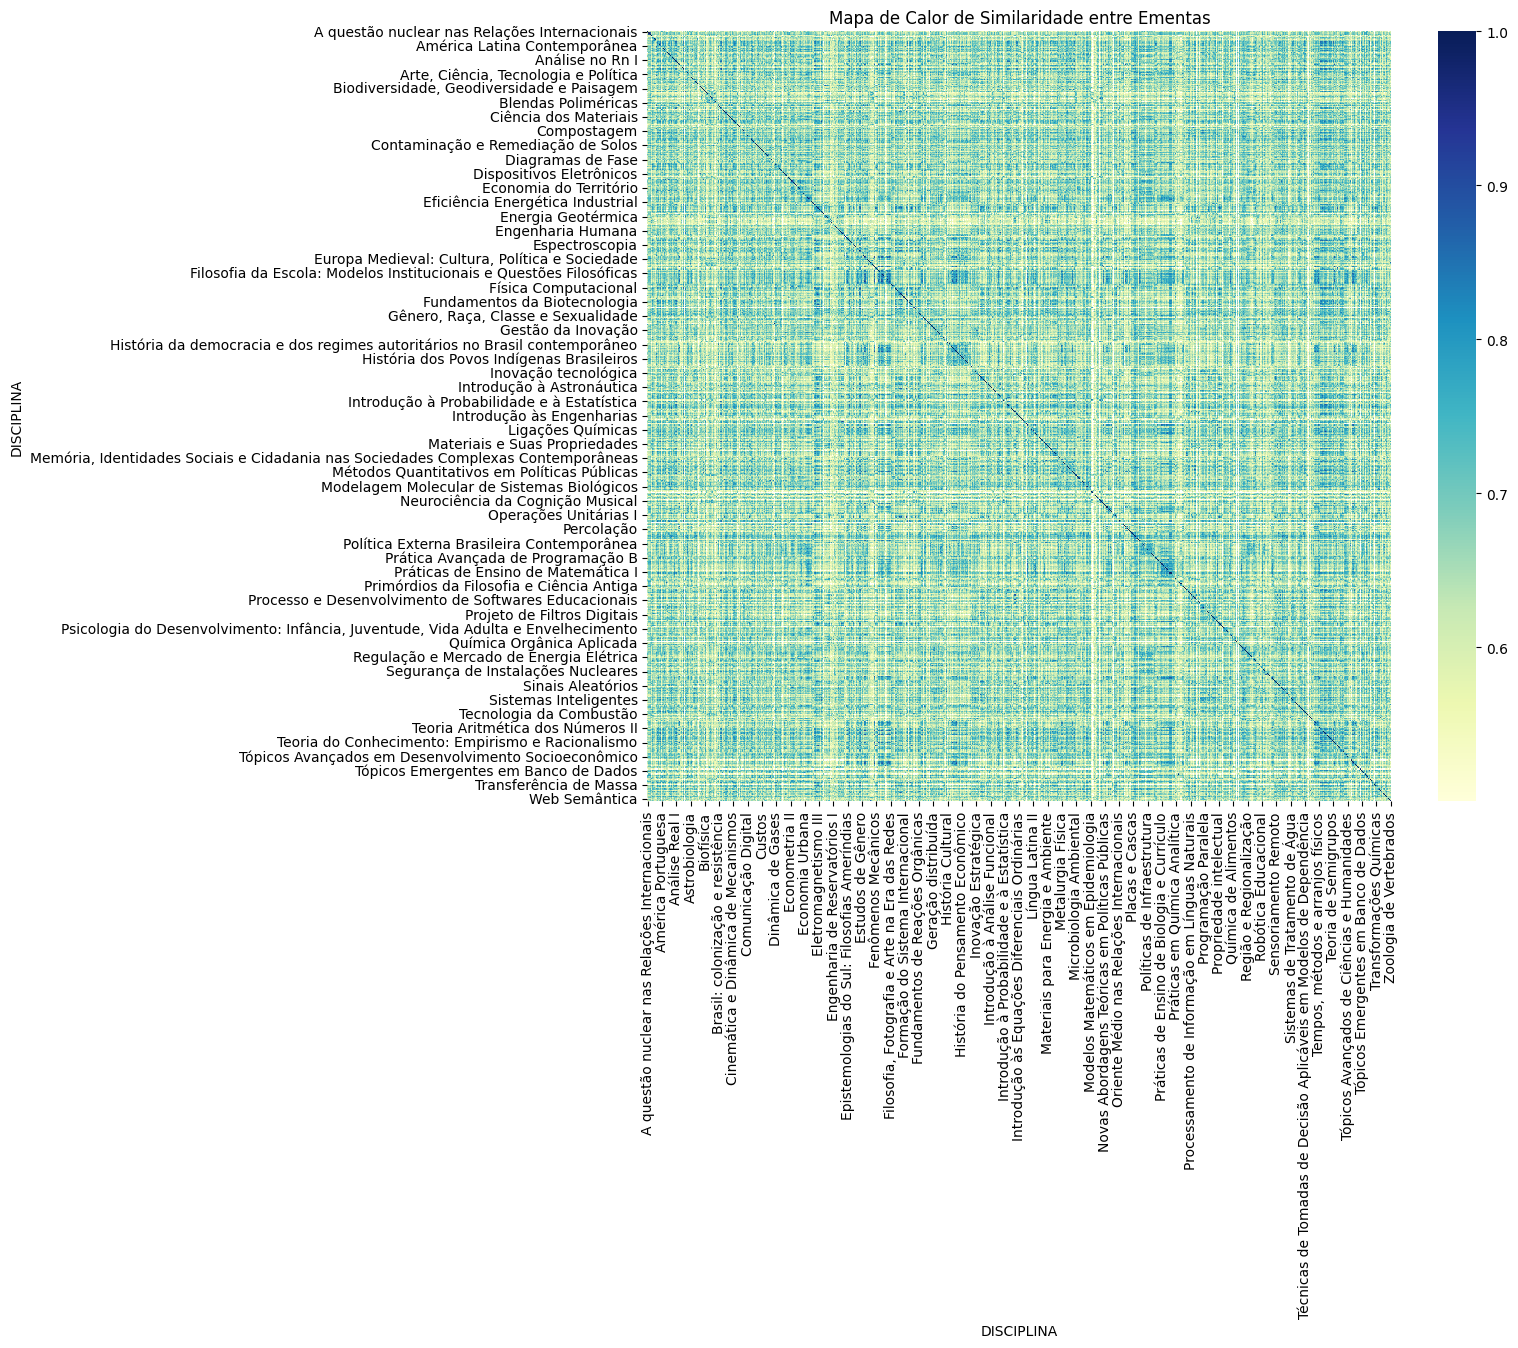

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar matriz de similaridade como DataFrame
similarity_df = pd.DataFrame(cosine_sim_bert, index=df['DISCIPLINA'], columns=df['DISCIPLINA'])

# Plotar heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, cmap='YlGnBu', annot=False, mask=(similarity_df < 0.5))
plt.title('Mapa de Calor de Similaridade entre Ementas')
plt.show()

## Limitações:

Primeiramente esse não é um curso de educação e portanto as similarides encontradas aqui não refletem necessariamente a similaridade do que é passado em sala de aula. Aqui o foco é sujerir alterações entre as disciplinas da universidade buscando maior interdisiciplinariedade. 

## Conclusões
Podemos pensar em disciplinas comuns a diferentes cursos como por exemplo as disciplinas similares encontradas: 

- Disciplinas similares: Introdução à Inferência Estatística e Introdução à Probabilidade e à Estatística (Similaridade: 0.84)
- Disciplinas similares: Introdução à Inferência Estatística e Métodos Empíricos para Avaliação de Políticas Públicas (Similaridade: 0.81)
- Disciplinas similares: Introdução à Inferência Estatística e Métodos Quantitativos em Políticas Públicas (Similaridade: 0.92)
- Disciplinas similares: Introdução à Inferência Estatística e Técnicas de Tomadas de Decisão Aplicáveis em Modelos de Dependência (Similaridade: 0.82)
- Disciplinas similares: Análise de Dados para o Planejamento Territorial e Introdução à Inferência Estatística (Similaridade: 0.83)
- Disciplinas similares: Análise de Regressão e Introdução à Inferência Estatística (Similaridade: 0.81)
- Disciplinas similares: Análise Multivariada e Introdução à Inferência Estatística (Similaridade: 0.82)
- Disciplinas similares: Análises de dados ambientais e Introdução à Inferência Estatística (Similaridade: 0.84)
- Disciplinas similares: Bioestatística e Introdução à Inferência Estatística (Similaridade: 0.87)
- Disciplinas similares: Confiabilidade Industrial em Sistemas de Gestão e Introdução à Inferência Estatística (Similaridade: 0.80)
- Disciplinas similares: Econometria I e Introdução à Inferência Estatística (Similaridade: 0.87)
- Disciplinas similares: Econometria II e Introdução à Inferência Estatística (Similaridade: 0.85)
- Disciplinas similares: Estatística Aplicada a Sistemas de Gestão e Introdução à Inferência Estatística (Similaridade: 0.86)
- Disciplinas similares: Inferência Estatística e Introdução à Inferência Estatística (Similaridade: 0.87)
- Disciplinas similares: Introdução à Estatística Bayesiana e Introdução à Inferência Estatística (Similaridade: 0.83)

Nesse caso poderiamos ter um nome comum a essas como 
- inferencia estatistica em dados biologicos
- inferencia estatistica em dados de politicas publicas
- inferencia estatistica em dados de planejamento territorial
- inferencia estatistica em dados de gestão
- inferencia estatistica em dados economicos

permitindo que cada curso possa dar o seu enfoque e também que informe o aluno que o curso tem grande similaridade. 

Porem essa análise também tem algumas questões que trouxe similaridades entre disciplinas que são recomendações uma das outras o que não faz sentido pedagógico fundir essas disciplinas ou fazer alguma equivalencia delas. 






